# Audiotechnik I: Raumakustik, SoSe 2022
#### Prof. Dr. Stefan Weinzierl
## Hausaufgabe I

## Hinweise

Abzugeben ist eine Jupyter Notebook Datei mit Text und Python Code einschließlich daraus erzeugten Abbildungen. Achten Sie darauf, dass alle formalen Anforderungen eines wissenschaftlichen Textes (Literaturverweise, gut beschriftete Abbildungen etc.) erfüllt sind und dass der Code gut dokumentiert und ausführbar ist. 

Abgabetermin ist Sonntag, 29. Mai (23:55 Uhr). Das Notebook mitsamt aller Dateien, die zum Ausführen des Notebooks notwendig sind, soll als ipynb-Datei mit der Namenskonvention 'Gruppe_Gruppennummer_Hausaufgabe_1.ipynb' bei ISIS hochgeladen werden. Nach 23:55 Uhr schließt die Uploadoption, verspätete Abgaben werden nicht berücksichtigt.


In [1]:
# Zur Lösung der Hausaufgabe können folgende Module verwendet werden

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import pyfar as pf
import IPython.display as ipd

## Aufgabe 1

Erzeugen Sie eine Bandpass-Filterbank für akustische Analysen in Oktavbändern mit Mittenfrequenzen von 125 Hz bis 8 kHz. Verwenden Sie Butterworth-Filter 10. Ordnung und eine Filterstruktur mit einer Serie von Biquad-Filtern (second order sections). Zeigen Sie exemplarisch, dass im Oktavband mit fm = 1 kHz die Anforderungen der DIN EN 61260-1 für Oktavfilter der Klasse 1 erfüllt sind, indem Sie den Amplitudengang des Filters und die Toleranzgrenzen der DIN plotten.
(5 Punkte)

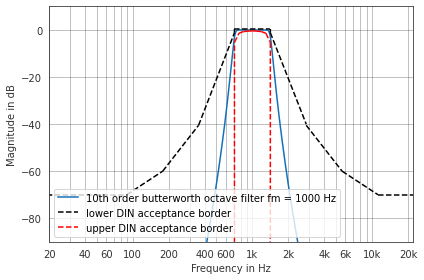

In [2]:
# Loesung Aufgabe 1

# %matplotlib qt
fs = 44100
dirac = pf.signals.impulse(2**17, sampling_rate=44100)
filterBank = pf.dsp.filter.fractional_octave_bands(dirac, 1, sampling_rate=None, freq_range=(125.0, 8000.0), order=10)

pf.plot.freq(filterBank[3], label='10th order butterworth octave filter fm = 1000 Hz')

f1 = 1000*(10**0.3)**-0.5
#print(f1)
f2 = 1000*(10**0.3)**0.5

#Mittenfrequenzen
fms = np.zeros(9)
for j, i in enumerate(range(-4, 5)):
    fms[j] = 1000*(10**0.3)**((2*i + 1)/2)

#uneven mid freqs for upper border
fms_uneven = np.zeros(6)
partials = [(-3/8), (-1/4), (-1/8), (1/8), (1/4), (3/8)]
for j, i in enumerate(partials):
    fms_uneven[j] = 1000*(10**0.3)**(partials[j])

# plot the lower border border of DIN EN 61260
plt.plot([0, fms[0]], [-70, -70], label='lower DIN acceptance border', color='k', linestyle='dashed')
plt.plot([fms[0], fms[1]], [-70, -60], [fms[1], fms[2]], [-60, -40.5], [fms[2], (f1 - 0.01)], [-40.5, -1.2], [(f1 - 0.01), f1], [-1.2, 0.4], [f1, (f2 - 0.01)], [0.4, 0.4], [(f2 - 0.01), f2], [0.4, -1.2], [f2, fms[5]], [-1.2, -40], [fms[5], fms[6]], [-40.5, -60], [fms[6], fms[7]], [-60, -70], [fms[7], len(filterBank.freq.T)], [-70, -70], color='k', linestyle='dashed')
# plot the upper border border of DIN EN 61260
plt.plot([(f1 - 0.01), f1],[-90, -5.3], label='upper DIN acceptance border', color='r', linestyle='dashed')
plt.plot([f1, fms_uneven[0]], [-5.3, -1.4], [fms_uneven[0], fms_uneven[1]], [-1.4, -0.7], [fms_uneven[1], fms_uneven[2]], [-0.7, -0.5], [fms_uneven[2], 1000], [-0.5, -0.4], [1000, fms_uneven[3]], [-0.4, -0.5], [fms_uneven[3], fms_uneven[4]], [-0.5, -0.7], [fms_uneven[4], fms_uneven[5]], [-0.7, -1.4], [fms_uneven[5], (f2 - 0.01)], [-1.4, -5.3], [(f2 - 0.01), f2], [-5.3, -90], color='r', linestyle='dashed')

plt.legend(loc='lower left')

# interactive plot so you can zoom in
plt.show()



## Aufgabe 2

fm = 1000
delta_a = A - A_ref
Grenzfrequenzen Durchlassbereich: 

a. Laden Sie die Impulsantwort „RIR_Vicenza“.
Berechnen Sie die mit der oben erzeugten Filterbank die bandpassgefilterten Impulsantworten und plotten diese als quadrierte und auf den Maximalwert als 0 dB-Punkt normierte und logarithmierte Kurven. Die folgenden Berechnungsschritte sollen für jedes Oktavband durchgeführt werden. Die Berechnung entspricht einer leicht vereinfachten Version des in 

Lundeby, A., Vigran, T. E., Bietz, H., & Vorländer, M. (1995). Uncertainties of measurements in room acoustics. Acta Acustica united with Acustica, 81(4), 344-355.

beschriebenen Vorgehens. (2 Punkte)

Text(0.5, 0, 'Time / s')

<Figure size 432x288 with 0 Axes>

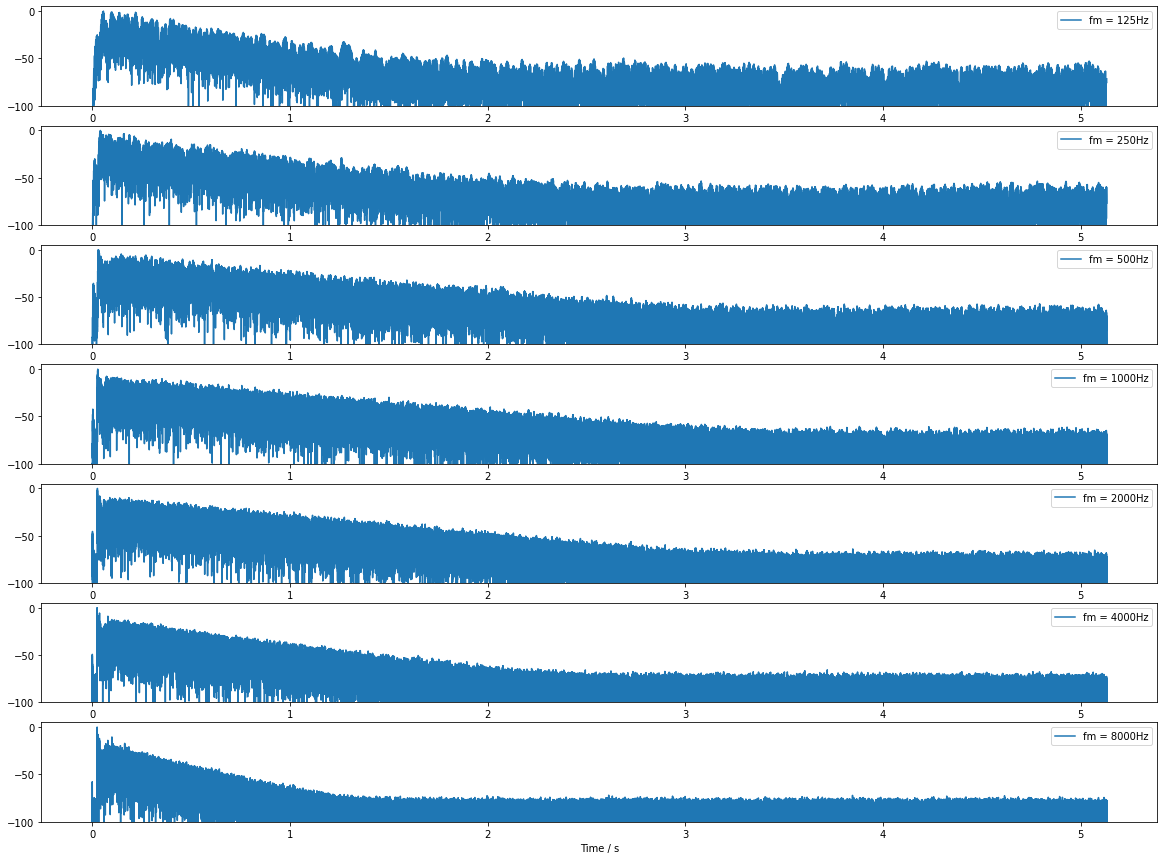

In [3]:
# Loesung Aufgabe 2a

# %matplotlib notebook
# Loesung Aufgabe 2a
fm = [125,250,500,1000,2000,4000,8000]
borderfreqs = []
for i in fm:
    borderfreqs.append(i /np.sqrt(2)) #calculates the lower and upper frequencys for the bandpass filter
borderfreqs.append(8000*np.sqrt(2)) # also adds the last missing upper frequency
filters = []
for i in range(7):
    filters.append(pf.dsp.filter.butterworth(None,10,[borderfreqs[i],borderfreqs[i+1]],'bandpass',sampling_rate=44100)) # gives the filter coefficients for the 7 octaves


fig = plt.figure()
fig, ax = plt.subplots(7,1, figsize=(20,15))
RIR = pf.io.read_audio('audio/RIR_Vicenza.wav') 
fs = RIR.sampling_rate
RIR_list_log = []
RIR_list_sq = []
time = np.linspace(0,len(RIR.time.T)/fs,len(RIR.time.T)) # makes a time array with the length of the RIR

for i in range(len(filters)):
    RIR_filtered = filters[i].process(RIR)   # filter the RIR 
    RIR_sq = (RIR_filtered.time**2).T[:,0]   # square the filtered RIR, Transpose and only take the data from the signal
    RIR_sq_norm_log = 10 * np.log10(RIR_sq/np.max(RIR_sq)) # normalize it and do the log

    RIR_list_sq.append(RIR_sq)               # saving both squared RIR and normalized & log'ed RIR as lists
    RIR_list_log.append(RIR_sq_norm_log)

    ### plotting stuff ###
    plotlabel = 'fm = ' +str(125*(2**i))+'Hz'
    ax[i].plot(time, RIR_sq_norm_log, label = plotlabel)
    ax[i].set_ylim(-100,5 )
    ax[i].legend()

ax[6].set_xlabel('Time / s')

b. Berechnen Sie geglättete und wiederum normierte Versionen der quadrierten Impulsantwort als gleitenden Mittelwert mit einem Rechteckfenster von 50 ms Länge und Normierung auf das Maximum der geglätteten Kurve (0 dB-Punkt). Plotten Sie diese für die sieben Oktavbänder. (2 Punkte)

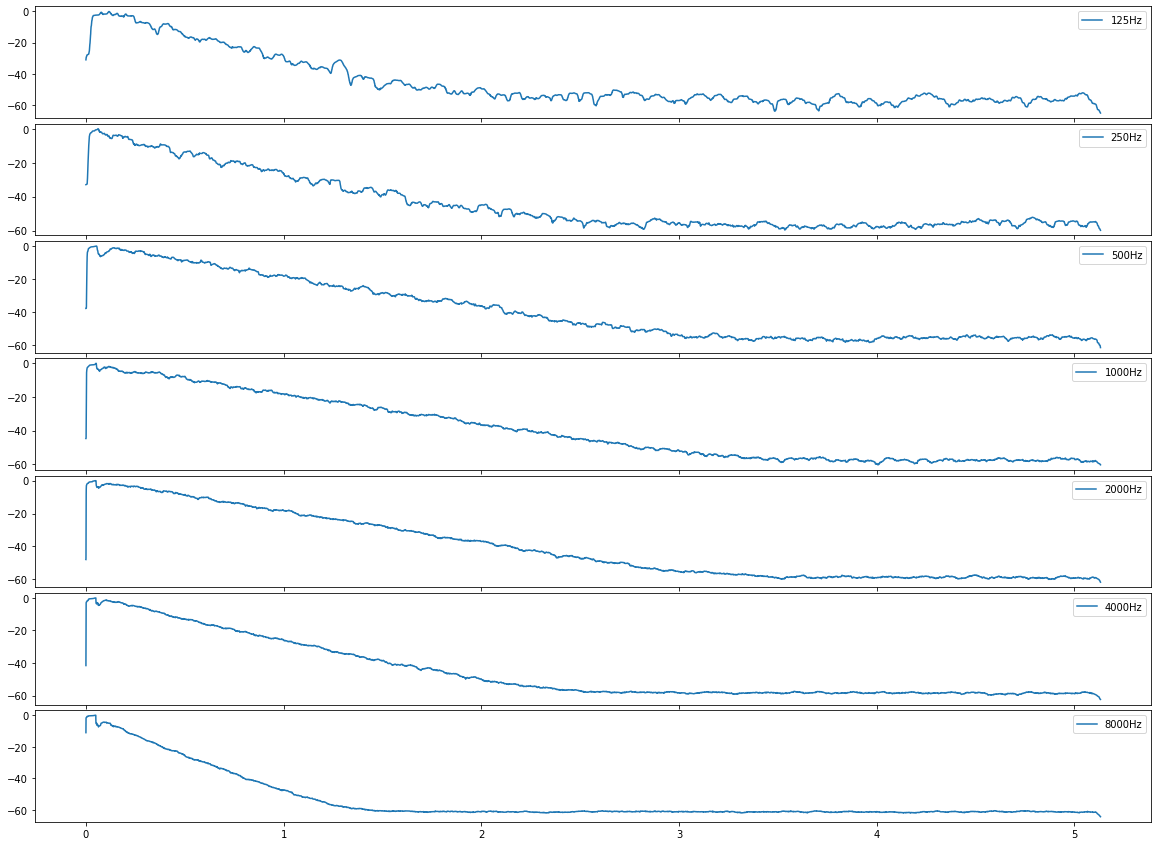

In [4]:
# Loesung Aufgabe 2b

fig, ax = plt.subplots(7,1, figsize=(20,15))

RIR_flat = []
fenster = np.ones(int(fs/20)) *20/fs # a rectangular window for smoothing the RIR using convolution
for j in range(len(filters)):
    flattened = np.convolve(RIR_list_sq[j], fenster, mode='same') # getting the smoothed version of the RIR from comvolve
    flattened = 10*np.log10(flattened/max(flattened)) # normalizing it and calculating the level
    RIR_flat.append(flattened)
    ax[j].plot(time,flattened, label=str(125*2**j)+'Hz')
    ax[j].legend(loc='upper right')

fig.subplots_adjust(hspace=.05)


c. Bestimmen Sie den Anfangspunkt der Impulsantworten als das Maximum der geglätteten Kurve und das Ende der Impulsantwort als Schnittpunkt einer initialen Schätzung der Steigung der geglätteten Kurve mit dem Noise Floor. Die Steigung soll als lineare Regressions zwischen dem Maximum der geglätteten Kurve und einem Punkt 10 dB oberhalb des Noise Floors berechnet werden, der Noise Floor als energetischer Mittelwert über die letzten 10 % der Impulsantwort. Markieren Sie Anfangs- und Endpunkt in der Darstellung der Kurven. (3 Punkte)

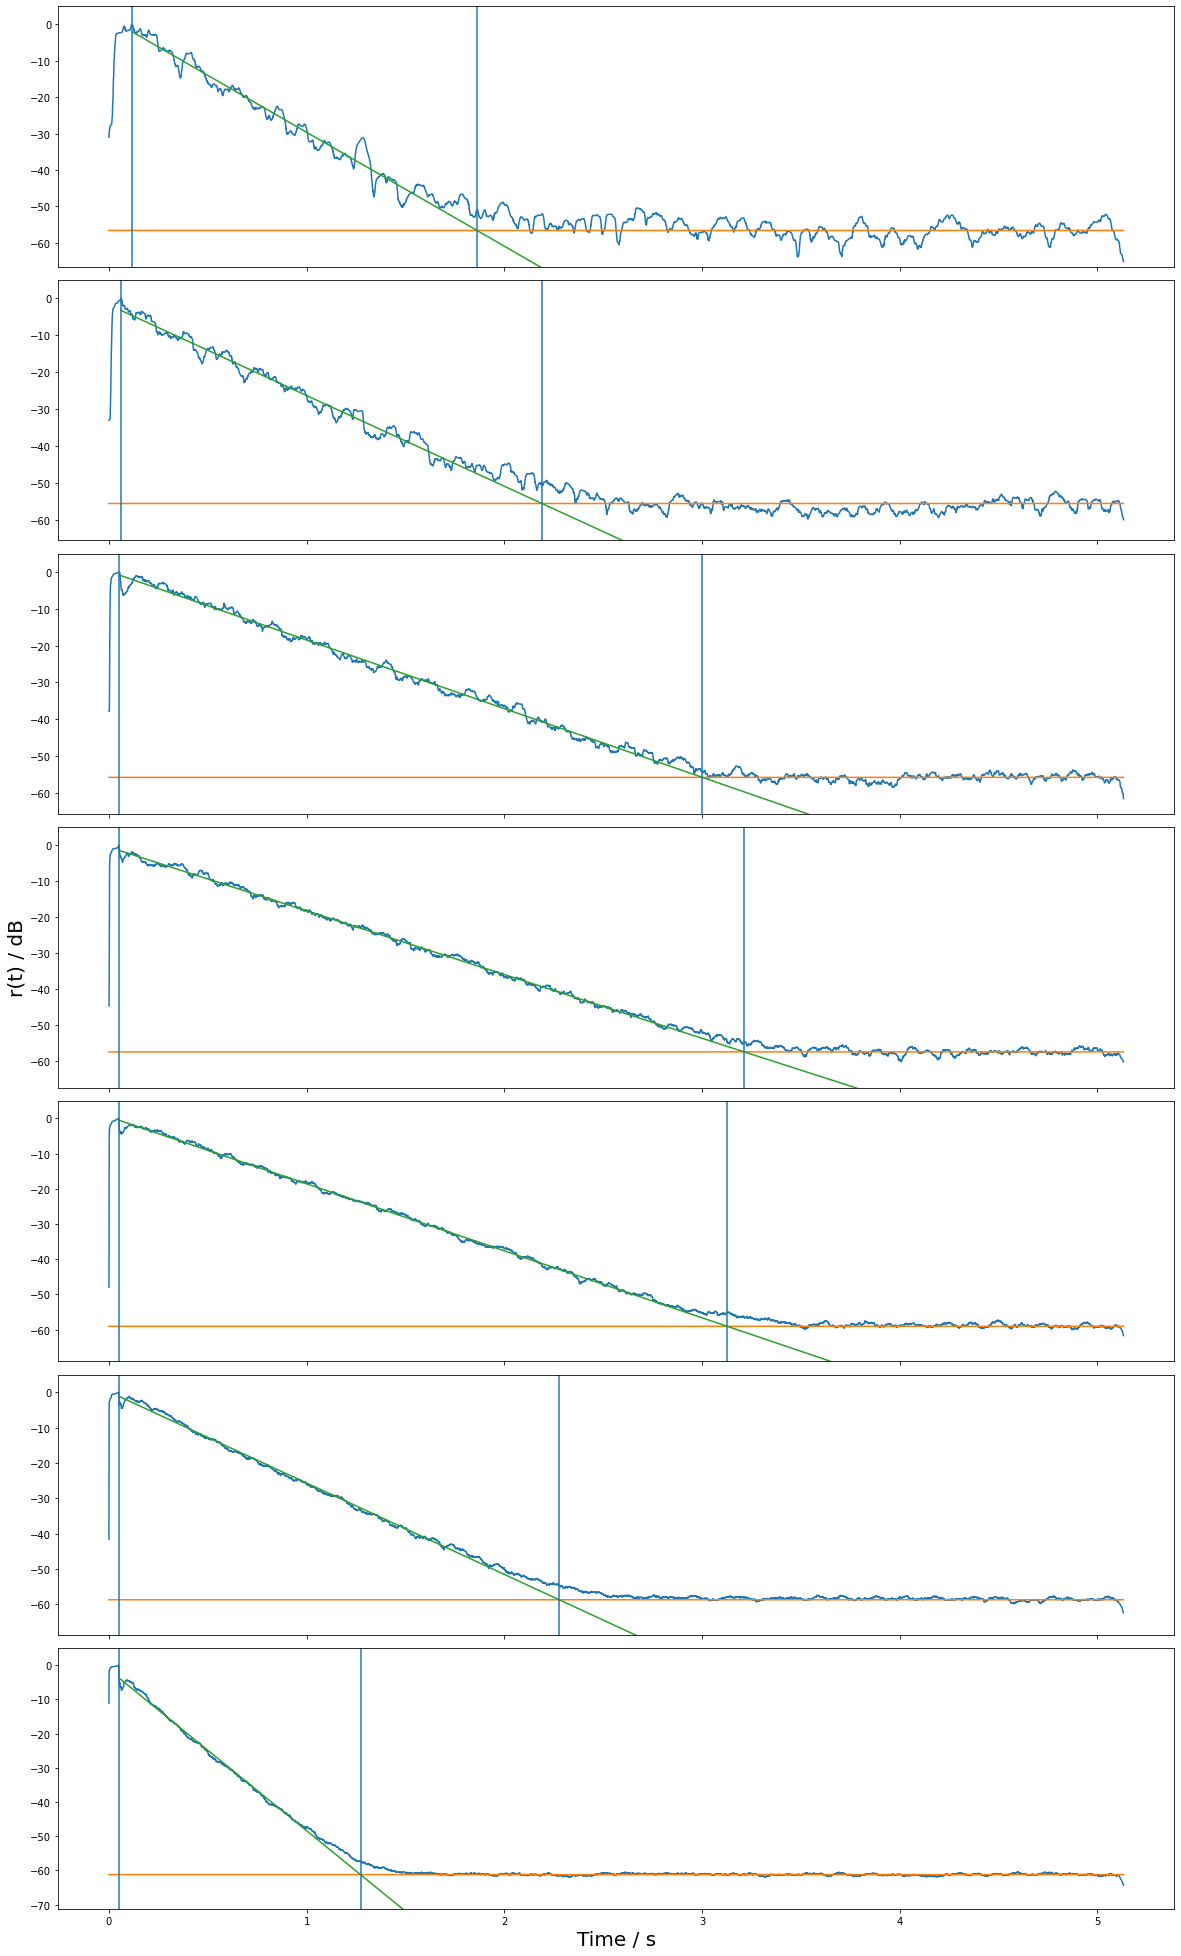

In [5]:
# Loesung Aufgabe 2c
last10percent = []
noisefloor = []
crossing = [] #crossing points of noisefloor and regression
m_n = [[], []] #array for storing regression parameters
starts = []
crossing_bin = []
fig, ax = plt.subplots(7,1, figsize=(20,35), sharex=True)
for i in range(len(RIR_flat)):
    start = np.argmax(RIR_flat[i]) # sets the starting point to the maximum of the RIR
    starts.append(start) # saves it for later use

    last10percent.append(RIR_flat[i][int(0.9*len(RIR_flat[i])):]) # makes an array containing only the last 10% of the RIR
    noisefloor.append(np.mean(last10percent[i])) # calculating the noisefloor by calculating the mean of the last 10% and saving it in an array
    
    stop = list(map(int, RIR_flat[i].tolist())).index(int(noisefloor[i]+10)) # finds the index of the point where the RIR is 10 dB above the noise floor. This function is only precise to a full decibel, but it should work well enough still.

    m, n = np.polyfit(x=time[start:stop], y=RIR_flat[i][start:stop],deg=1) #computes linear regression line between <start> and <stop>
    m_n[0].append(m) # saves regression parameters for later use
    m_n[1].append(n)

    crossing.append((noisefloor[i]-n)/m) # saves the time of the crossing point in an array
    crossing_bin.append(int(crossing[i]*fs)) # saves bin number of the crossing point in an array

    ### plotting stuff
    ax[i].plot(time,RIR_flat[i])
    ax[i].plot(time,noisefloor[-1]*np.ones(len(time)))
    ax[i].plot(time[start:],m*time[start:]+n)
    ax[i].set_ylim(noisefloor[i]-10,5)
    ax[i].axvline(time[start])
    ax[i].axvline(crossing[i])

ax[3].set_ylabel('r(t) / dB', fontsize = 20.0)
ax[6].set_xlabel('Time / s', fontsize = 20.0)
fig.subplots_adjust(hspace=.05)


d. Berechnen Sie für jede dieser Kurven eine Kompensationsenergie Ecomp für den durch den Noise Floor verdeckten Teil des Ausklangs nach Lundeby et al. (1995, S. 347f.) (3 Punkte)

In [6]:
# Loesung Aufgabe 2d
E_comp = []
for i in range(len(RIR_flat)):
    y = m_n[0][i]*time[crossing_bin[i]:]+m_n[1][i] #calculates the line between the crossing point (of noise and RIR-regression) and end of the the file
    y_nolog = 10**(0.1*y) #from the log, go back to the actual values
    E_comp.append(np.sum(y_nolog)) # sum up all the values
    print('E_comp = '+str(round(E_comp[i],3))+' bei '+str(125*2**i)+' Hz')

E_comp = 0.013 bei 125 Hz
E_comp = 0.022 bei 250 Hz
E_comp = 0.027 bei 500 Hz
E_comp = 0.019 bei 1000 Hz
E_comp = 0.012 bei 2000 Hz
E_comp = 0.01 bei 4000 Hz
E_comp = 0.003 bei 8000 Hz


e. Berechnen Sie unter Verwendung des oben ermittelten Anfangs- und Endpunkts der Impulsantwort und der Kompensationsenergie Ecomp die Decay Curve als Rückwärtsintegration der quadrierten Impulsantwort (Schroeder-Integral). Plotten Sie diese für die sieben Oktavbänder. (2 Punkte)

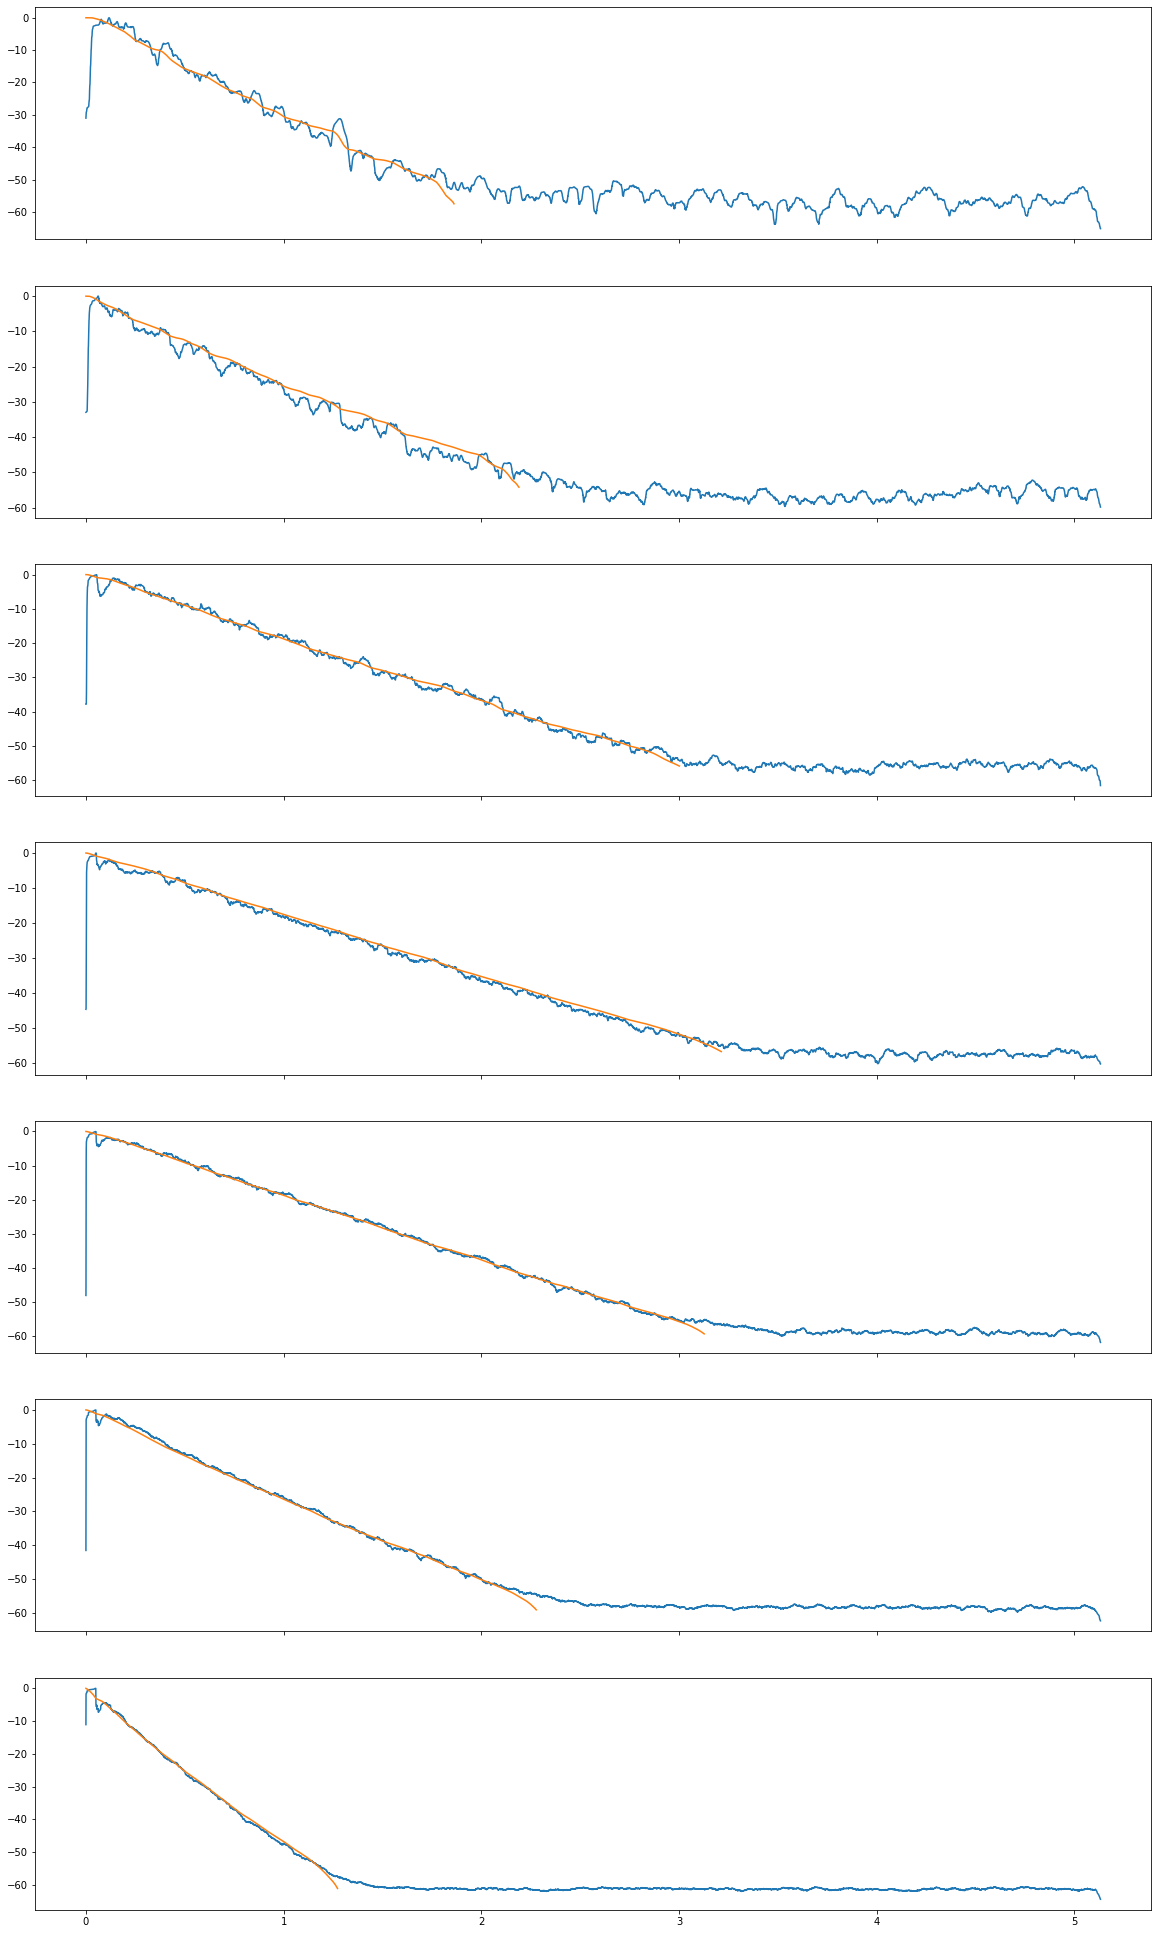

In [7]:
# Loesung Aufgabe 2e
fig, ax = plt.subplots(7,1, figsize=(20,35), sharex=True)
schroeder = []
schroeder_log = []
for i in  range(len(RIR_flat)):
    reverseRIR = 10**(0.1*np.flip(RIR_flat[i][:crossing_bin[i]])) #reverse order of RIR array, and calculating back to the non-logarithmic value
    schroeder.append([E_comp[i]]) # the first value of the integral is the compensation energy
    schroeder_log.append([])
    for j in range(1,len(reverseRIR)+1):
        schroeder[i].append(schroeder[i][j-1]+reverseRIR[j-1]) # do the schroeder integral by numerical integration, step by step
    schroeder_log[i] = np.flip(10*np.log10(schroeder[i])-max(10*np.log10(schroeder[i]))) #calculating the log of the schroeder integral, normalize it and reversing it again
    ax[i].plot(time, RIR_flat[i])
    ax[i].plot(time[:crossing_bin[i]+1], schroeder_log[i])

f. Bestimmen Sie in Oktavbändern die Nachhallzeiten T10, T20 und T30 aus den Decay Curves als Steigung einer linearen Regressionsgeraden zwischen den in ISO 3382:2008 definierten Anfangs- und Endpunkten. Prüfen Sie jeweils, ob die für die Bestimmung von T10, T20 und T30 erforderlichen Signal-Rauschabstände gegeben sind und geben nur die Werte aus, bei denen dies der Fall ist. (3 Punkte)

f, T10, T20, T30. If a value is zero, it cant be measured!
125 1.7568619975355964 1.865823542423244 2.020901175327835
250 2.534827860210343 2.4416547774818076 2.521918764519367
500 3.010326354661789 3.0622986370254877 3.2392301432141446
1000 3.1824172766361194 3.329833177340368 3.3588592878650165
2000 3.041959936241214 3.1293946696465107 3.127788563915232
4000 2.057123273327221 2.2260984918456868 2.2960681329953156
8000 1.1108489801749162 1.178736698043506 1.239262701625717


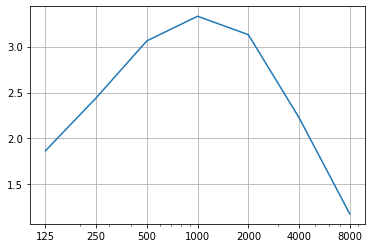

In [13]:
# Loesung Aufgabe 2f
def nearest_index(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx
#find start and endpoints
print('f, T10, T20, T30. If a value is zero, it cant be measured!')
T20_list = []
for i in range(len(filters)):
    b5, b15, b25, b35 = nearest_index(schroeder_log[i], -5), nearest_index(schroeder_log[i], -15), nearest_index(schroeder_log[i], -25), nearest_index(schroeder_log[i], -35) #finds the index where the Schroeder integral is -5, -15, -25, -35 dB.
    m10, _ = np.polyfit(x= time[b5:b15], y= schroeder_log[i][b5:b15], deg= 1) # regression over the schroeder integral, from -5 dB to (-15,-25,-35) dB respectively.
    m20, _ = np.polyfit(x= time[b5:b25], y= schroeder_log[i][b5:b25], deg= 1)
    m30, _ = np.polyfit(x= time[b5:b35], y= schroeder_log[i][b5:b35], deg= 1)
    if noisefloor[i] > -25: # checks if the noisefloor is low enough (according to ISO 3382:2008) to measure T10, T20, T30. If its too high, it gets replaced by a Zero.
        T10 = 0
    else: 
        T10 = -60/m10
    if noisefloor[i] > -35:
        T20 = 0
    else:
        T20 = -60/m20
    if noisefloor[i] > -45:
        T30 = 0
    else:
        T30 = -60/m30
    T20_list.append(T20)
    print(str(125*2**i),T10, T20, T30)

x_ticks = [125, 250, 500, 1000, 2000, 4000, 8000]
ax = plt.subplot()
ax.set_xscale('log')
ax.set_xticks(x_ticks, labels=x_ticks)
ax.grid()
ax.plot(fm, T20_list)


<img src="Vicenza_Weinzierl.png"/>

g. Bestimmen Sie, unter Berücksichtigung der in c. bestimmten Anfangs- und Endpunkte sowie der in d. bestimmten Kompensationsenergie, die Werte für <s>das Stärkemaß G</s> und das Klarheitsmaß C80 in Oktavbändern, sowie Einzahlwerte als Mittelwerte über die in DIN EN 3382-1:2008 vorgesehenen Oktavbänder. (3 Punkte)

In [35]:
# Loesung Aufgabe 2g
vals = []
for i in range(len(RIR_flat)):
    RIR_flat_nolog = 10**(0.1*RIR_flat[i])
    time80 = starts[i]+ int(fs * 0.08) # index of 80 ms after start time
    C_80 = 10 * np.log10(np.sum(RIR_flat_nolog[starts[i]:time80])/(np.sum(RIR_flat_nolog[time80:]))+E_comp[i])
    vals.append(C_80)
    print('C80 =', round(C_80,1), 'dB @', str(125*2**i), 'Hz')


# Mittelwert
for i in range(len(vals)):
    vals[i] = 10**(0.1*vals[i])

mean = 10*np.log10(1/(len(vals)) * np.sum(vals))
print('C80_Mean = ', round(mean, 1), 'dB')

C80 = -0.9 dB @ 125 Hz
C80 = -1.9 dB @ 250 Hz
C80 = -6.2 dB @ 500 Hz
C80 = -4.5 dB @ 1000 Hz
C80 = -5.2 dB @ 2000 Hz
C80 = -3.1 dB @ 4000 Hz
C80 = 0.8 dB @ 8000 Hz
C80_Mean =  -2.4 dB


h. Vergleichen Sie Ihre Berechnungen mit den in 

Weinzierl, S., Sanvito, P., Schultz, F., & Büttner, C. (2015). The acoustics of renaissance theatres in Italy. Acta Acustica United with Acustica, 101(3), 632-641.

veröffentlichten Werten und diskutieren Sie Gründe für eine nicht perfekte Übereinstimmung. (3 Punkte)

### Lösung Aufgabe 2h

Die hier berechneten Nachhallzeiten T20 des Teatro Olimpico stimmen bis auf kleinere Abweichungen einigermaßen mit den von Weinzierl et al. (2015) veröffentlichten Messungen überein.
Das über die Freqzenzbänder gemittelte Klarheitsmaß  weicht um 1,6 dB von dem von Weinzierl et al. ermittelten und über alle 9 Messpositionen gemittelten Klarheitsmaß ab.

Gründe für die Abweichungen könnten die folgenden sein:
    1. Weinzierl et al. maßen die Impulsantworten an verschiedenen Stellen im Raum und mittelten die zu untersuchenden Größen über alle     Messpositionen. Für die hier ermittelten Werte wurde lediglich die Impulsantwort einer Position im Raum verwendet.

    2. 
